In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import skimage 

sys.path.append('ml_pipeline')
from scipy.signal import resample

from ml_pipeline.feature_extractor import *
from ml_pipeline.audio import *

/Users/daniel.kohlsdorf/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


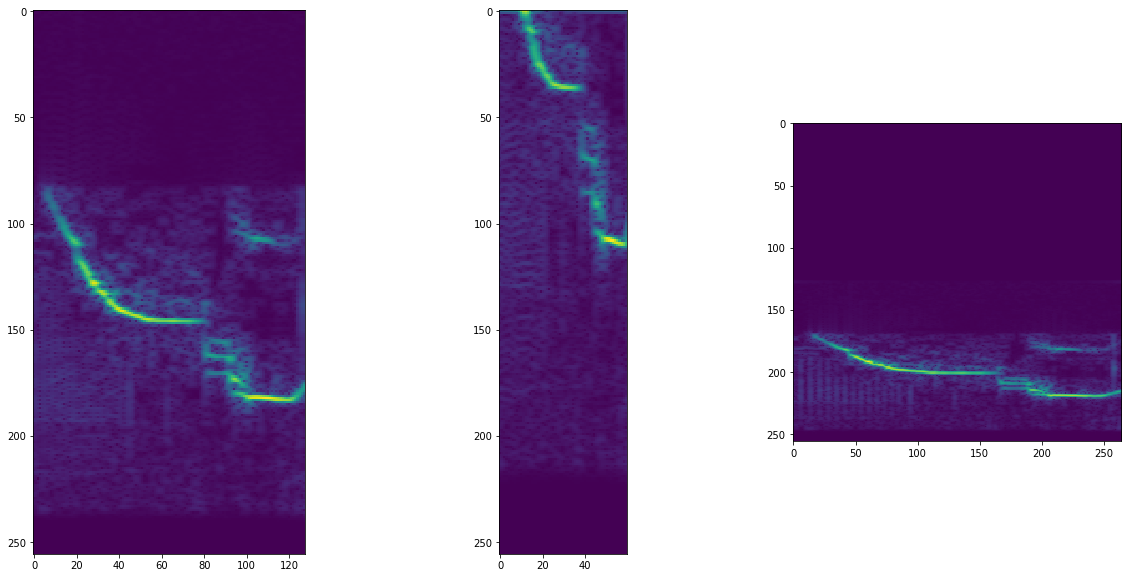

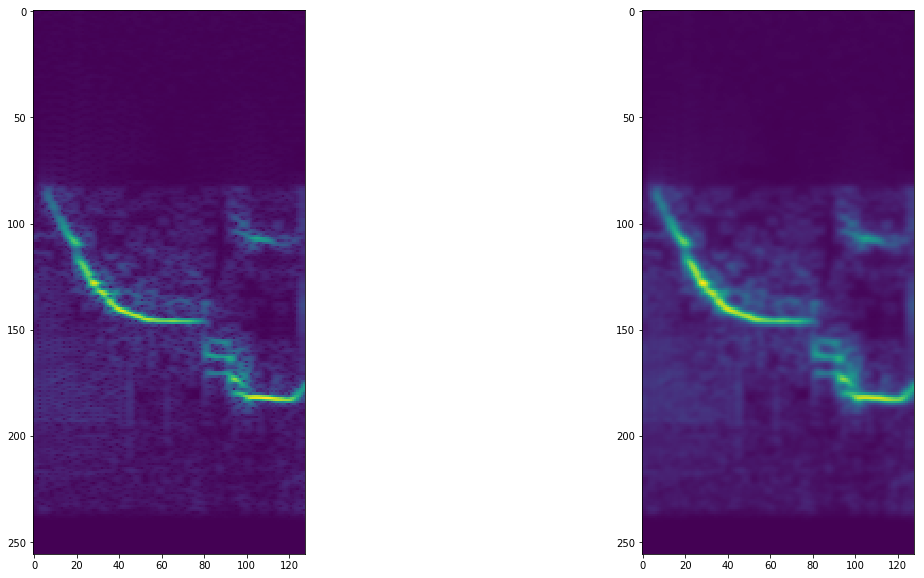

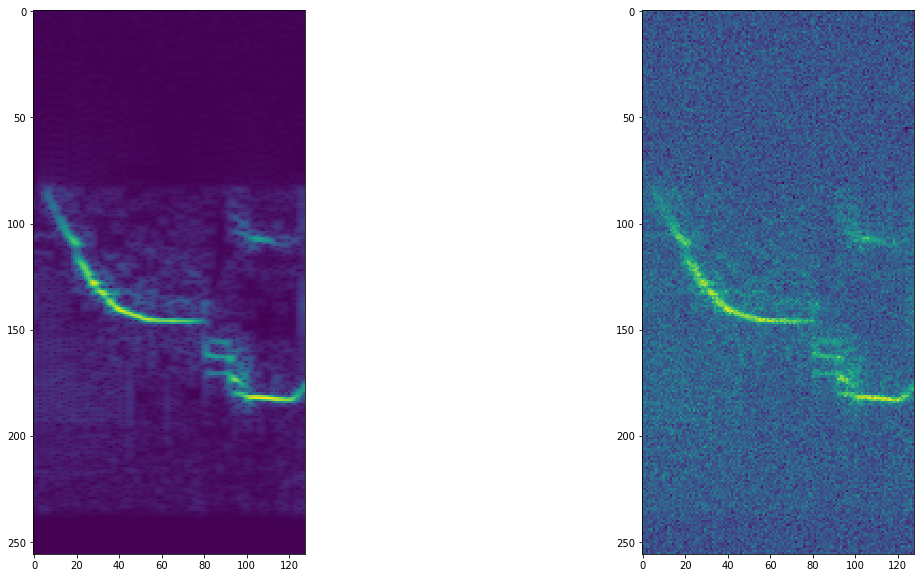

In [3]:
def sampling(filename):
    x = read(filename)
    x_downsample = resample(x, int(len(x) / 2))
    x_upsample = resample(x, len(x) * 2)

    spec_x = fwd_spectrogram(x)[:, 256:]
    spec_x = librosa.pcen(spec_x, gain=0.2, bias=5)
    spec_downsample = fwd_spectrogram(x_downsample)[:, 256:]
    spec_downsample = librosa.pcen(spec_downsample, gain=0.2, bias=5)
    spec_upsample = fwd_spectrogram(x_upsample)[:, 256:]
    spec_upsample = librosa.pcen(spec_upsample, gain=0.2, bias=5)

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(spec_x.T)
    plt.subplot(1, 3, 2)
    plt.imshow(spec_downsample.T)
    plt.subplot(1, 3, 3)
    plt.imshow(spec_upsample.T)
    
def blur(filename):
    x       = read(filename)
    spec_x  = fwd_spectrogram(x)[:, 256:]
    spec_x  = librosa.pcen(spec_x, gain=0.2, bias=5)
    blurred = skimage.filters.gaussian(
        spec_x, sigma=(1, 1), truncate=3.5, multichannel=False)
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(spec_x.T)
    plt.subplot(1, 2, 2)
    plt.imshow(blurred.T)

def noise(filename, influence=0.5):
    x       = read(filename)
    spec_x  = fwd_spectrogram(x)[:, 256:]
    spec_x  = librosa.pcen(spec_x, gain=0.2, bias=5)
    spec_x  = (spec_x - np.mean(spec_x)) / np.std(spec_x)
    noise   = (1.0 - influence) * spec_x + (influence) * np.random.normal(0, 1, spec_x.shape[0] * spec_x.shape[1]).reshape((spec_x.shape[0], spec_x.shape[1]))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(spec_x.T)
    plt.subplot(1, 2, 2)
    plt.imshow(noise.T)
    
sampling('data/unsupervised/whistle13.wav')
blur('data/unsupervised/whistle13.wav')
noise('data/unsupervised/whistle13.wav')

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import * 
from tensorflow.keras.losses import * 
import tensorflow_addons as tfa
import os

e  = encoder((None, 256, 1), 128, (8,8,256))
i1 = Input((None, 256, 1))
i2 = Input((None, 256, 1))
a = e(i1)
b = e(i2)
y_pred = tf.linalg.norm(a - b, axis=1)
model = Model(inputs=[i1, i2], outputs=[y_pred])
model.compile(optimizer='adam', loss='contrastive_loss')
model.summary()

e.predict(np.zeros((1, 64, 256, 1))).shape
model.predict(np.zeros((1, 64, 256, 1))).shape

In [9]:
%pip install tensorflow-addons

     |████████████████████████████████| 613 kB 862 kB/s 
You should consider upgrading via the '/Users/daniel.kohlsdorf/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
def no_label(f,x):
    """
    Return none for no label

    :returns: None
    """
    return None

mem = []
for (x, _, _, _, _) in dataset(input_folder, params, lable, True):
    mem.append(x)
    if len(mem) == 100:
        y = np.random.randint(0, 2, 100).astype(np.float32)
        

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)